<a href="https://colab.research.google.com/github/M-Sravanthi/PyTorchTutorial/blob/main/03_ComputerVision_CNN_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Computer Vision

Reference - https://www.learnpytorch.io/03_pytorch_computer_vision/


## 0. Computer Vision libraries in PyTorch

* [`torchvision`] - base domain library
* `torchvision.datasets` - get datasets and data loading fucntions for Computer Vision
* `torchvision.models` - get pretrained CV models that you can leverage for your own problems
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable to use with an ML model
* `torch.utils.data.Dataset - Base dataset class for PyTorch
* torch.utils.data.DataLoader - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn
#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import matplotlib
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. Getting a dataset

The dataset we'll be using FashionMNIST from torchviosion.datasets - https://docs.pytorch.org/vision/0.8/datasets.html#fashion-mnist




In [2]:
# Setup training data
train_data = datasets.FashionMNIST(
    root='data', #where to save the downloaded data
    train = True, # download the training data (they already have train / test data)
    download = True,
    transform = torchvision.transforms.ToTensor(), # how do we want to transform the data
    target_transform = None #how do we want to rtansform the labels/targets
    )

test_data = datasets.FashionMNIST(
    root='data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
    )


100%|██████████| 26.4M/26.4M [00:02<00:00, 8.99MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 200kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 16.8MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
# Check the sape of our image
print(f"Image Shape: {image.shape} -> [colour_channels,height,width]")
print(f"Image Label: {class_names[label]}")

Image Shape: torch.Size([1, 28, 28]) -> [colour_channels,height,width]
Image Label: Ankle boot


### 1.2 Visualizing our data


image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

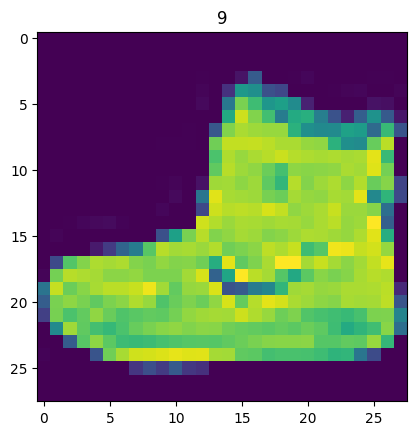

In [9]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

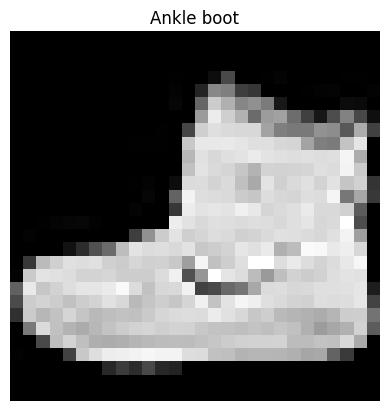

In [10]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)

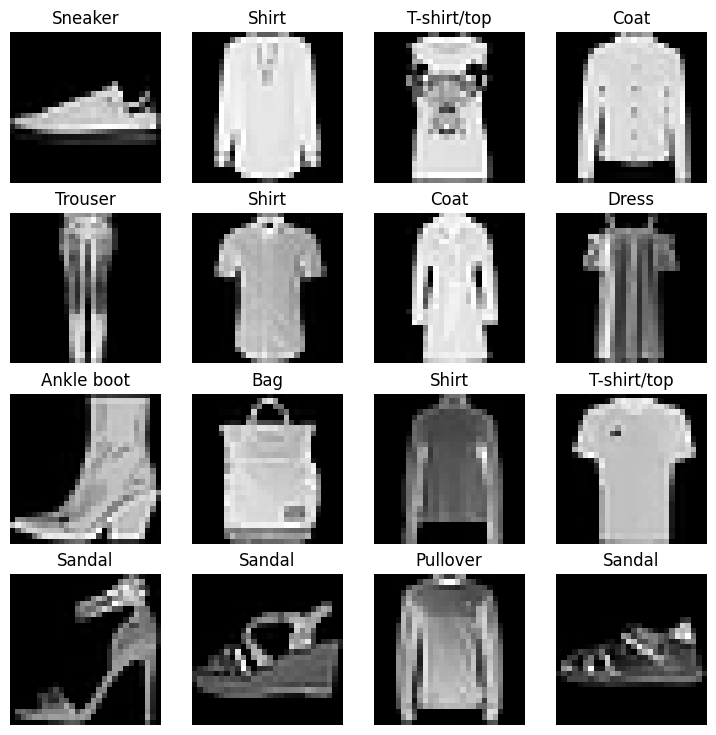

In [11]:
# Plot more images
random_seed = 42
fig = plt.figure(figsize = (9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img,label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False)

Do these items of clothing could be modelled with pure linear lines or non-linearities are required ?

## 2. Prepare dataloader

Right now the data is in the form of a PyTorch datasets
Dataloader turns our dataset into a Python iterable

More specifically, we want to turn our data into batches/ mini batches ?
* Reason: Sometimes the datasets have millions of datsets. It is not possible for the computer to look at 60000 images at once.
* 32 samples/images in one batch is the common batchsize - can be changed
* It gives our neural network more chances to update its gradients per epoch

For more on minibatches - https://www.youtube.com/watch?v=4qJaSmvhxi8


In [12]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size= BATCH_SIZE,
                             shuffle = False) # we use this for testing so need not shuffle

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79103cd8ac60>,
 <torch.utils.data.dataloader.DataLoader at 0x79103d0487a0>)

In [13]:
# Check the data - print

print(f"DataLoaders: {train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} ")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79103cd8ac60>, <torch.utils.data.dataloader.DataLoader object at 0x79103d0487a0>)
Length of train_dataloader: 1875 batches of 32 
Length of test_dataloader: 313 batches of 32


In [14]:
60000 / 32 # 60000 is the size of train data and 32 is batch size

1875.0

In [15]:
# Check what's inside one batch
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

img size: torch.Size([1, 28, 28])
label: 4


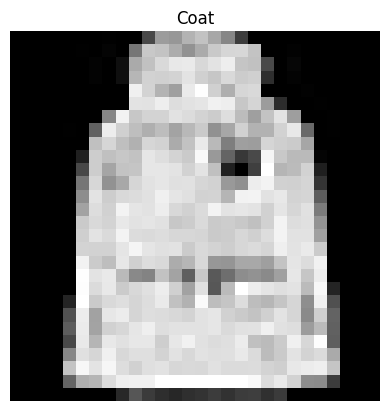

In [16]:
# Visualize a sample

#torch.manual_seed(42)
random_idx = torch.randint(0,len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis(False)
print(f"img size: {img.shape}")
print(f"label: {label}")

## 3. Model 0: Build a baseline model

Best practice is to start with a baseline model.
A baseline model is a simple model you will try to improve with subsequent models/experiments.
In other words: start simply and add complexity later when necessary


In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
# Flatten the sample
output = flatten_model(x) # perform forward pass

#Print out whats happening
print(f"Shape before flattening: {x.shape} -> color channels, ht, width")
print(f"Shape after flattening: {output.shape} -> colo channels, ht*wd ")


Shape before flattening: torch.Size([1, 28, 28]) -> color channels, ht, width
Shape after flattening: torch.Size([1, 784]) -> colo channels, ht*wd 


In [18]:
from torch import nn

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)



In [19]:
#Instantiate the model

model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10,
    output_shape= len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.2685, -0.1202, -0.0485, -0.3475,  0.2363,  0.0538,  0.4189, -0.1285,
          0.0664,  0.1643]], grad_fn=<AddmmBackward0>)

In [21]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0061, -0.0176,  0.0050,  ...,  0.0050, -0.0016,  0.0241],
                      [ 0.0124, -0.0333,  0.0192,  ..., -0.0272,  0.0074,  0.0167],
                      [-0.0077, -0.0035, -0.0294,  ...,  0.0233, -0.0012, -0.0210],
                      ...,
                      [ 0.0068, -0.0136, -0.0235,  ..., -0.0167, -0.0028, -0.0151],
                      [ 0.0092,  0.0154, -0.0064,  ...,  0.0245,  0.0136, -0.0243],
                      [ 0.0111,  0.0039, -0.0260,  ..., -0.0260,  0.0251, -0.0271]])),
             ('layer_stack.1.bias',
              tensor([-0.0259,  0.0139, -0.0249,  0.0325,  0.0096,  0.0258,  0.0197,  0.0227,
                      -0.0039, -0.0186])),
             ('layer_stack.2.weight',
              tensor([[ 0.0253,  0.0883, -0.0504, -0.1098,  0.1861,  0.0291,  0.2362, -0.1460,
                        0.2334, -0.1742],
                      [-0.2240,  0.1756, -0.0836, -0.1285, -0.2968, -0.1629, -0.


### 3.1 Set up loss and optimizer
* Loss function - since we re working with multiclass data our loss will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD` - Stochastic Gradient Descent

In [22]:
import requests
from pathlib import Path

# Download helper function from Learn Pytorch repo
if Path ('helper_functions.py').is_file():
  print('Already exists so skipping download')
else:
  print("Downloading helper functions...")
  requests = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py", "wb") as f:
    f.write(requests.content)

In [23]:
# Import accuracy metric
from helper_functions import accuracy_fn

# Set up loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.1)


### 3.2 Create a function to time the experiment
ML is very experimental

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [24]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time. """
  total_time = end - start
  print(f"Train time {device}: {total_time:.3f} seconds")
  return total_time


In [25]:
start_time = timer()
# some code...
end_time = timer()
print_train_time(start=start_time, end = end_time, device='cpu')

Train time cpu: 0.000 seconds


7.255699999575427e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Print whats happening
5. Time it all (for fun)


In [26]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the numper of epochs (we'll keep this small for faster training time)
epochs = 4

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ###Training
  train_loss = 0
  # Add a loop to loop the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #Sum the loss per batch

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step() #the hyperparameters are updated once per batch

    #Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at  {batch*len(X)}/{len(train_dataloader.dataset)} samples.") # len(X) = 32

  #Divide total train loss by length of the train_dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss / acc
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate acc
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print whats happening
  print(f"\nTrain loss: {train_loss:.2f} | Test loss: {test_loss:.2f} | Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))






  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.59 | Test loss: 0.51 | Test acc: 82.15%

Epoch: 1
-------
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.48 | Test loss: 0.48 | Test acc: 82.96%

Epoch: 2
-------
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.45 | Test loss: 0.48 | Test acc: 83.42%

Epoch: 3
-------
Looked at  0/60000 samples.
Looked at  12800/60000 samples.
Looked at  25600/60000 samples.
Looked at  38400/60000 samples.
Looked at  51200/60000 samples.

Train loss: 0.44 | Test loss: 0.46 | Test acc: 83.72%

Train time cpu: 55.390 seconds


## 4. Make predictions and get Model 0 results

In [27]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn
               ):

  """ Returns a dictionary containing the results of model predicitng on  data_loader."""
  loss,acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale the loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4639761447906494,
 'model_acc': 83.71605431309904}

## 5. Setup device agnostic code

In [28]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [29]:
torch.cuda.is_available()

False

In [30]:
# Setup device agnostic code
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

## 6. Model 1: Building a better model with non-linearity



In [31]:
# Create a model with linear and non-linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_shape),
        nn.ReLU(),
    )
  def forward(self,x):
    return self.layer_stack(x)


In [32]:
# Instantiate the model
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,
                              hidden_units =10,
                              output_shape=len(class_names)
                              ).to(device)
next(model_1.parameters()).device

device(type='cpu')

In [33]:
# Set up loss fn and an optimizer
# Importing accuracy_fn from helper_functions
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr = 0.1)
accuracy_fn

<function helper_functions.accuracy_fn(y_true, y_pred)>

In [34]:
# Build a training loop - PRACTICE PRACTICE PRACTICE
"""
from tqdm.auto import tqdm

torch.manual_seed(42)

epochs = 3

for epoch in range(tqdm(epochs)):
  train_loss = 0
  ### Training loop
  for batch, (X,y) in enumerate(train_dataloader):
    model_1.train()
    y_pred = model_1(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0,0
  model_1.eval()
  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):

      test_pred = model_1(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss

      acc = accuracy_fn(y_true = y, y_pred = test_pred)
      test_acc += acc

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"")
"""


'\nfrom tqdm.auto import tqdm\n\ntorch.manual_seed(42)\n\nepochs = 3\n\nfor epoch in range(tqdm(epochs)):\n  train_loss = 0\n  ### Training loop\n  for batch, (X,y) in enumerate(train_dataloader):\n    model_1.train()\n    y_pred = model_1(X)\n    loss = loss_fn(y_pred, y)\n    train_loss += loss\n    optimizer.zero_grad()\n    loss.backward()\n    optimizer.step()\n\n    if batch % 400 == 0:\n      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")\n\n  train_loss /= len(train_dataloader)\n  test_loss, test_acc = 0,0\n  model_1.eval()\n  with torch.inference_mode():\n    for batch,(X,y) in enumerate(test_dataloader):\n\n      test_pred = model_1(X)\n      loss = loss_fn(test_pred, y)\n      test_loss += loss\n\n      acc = accuracy_fn(y_true = y, y_pred = test_pred)\n      test_acc += acc\n\n    test_loss /= len(test_dataloader)\n    test_acc /= len(test_dataloader)\n\n  print(f"")\n'

### 6.2 Functionizing training and evaluating/test loops

Let's create a function for:
* training loop - train_step()
* testing loop  - test_step()

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  """Performs a training with model trying to learn on data_loader."""
  train_loss, train_acc = 0,0

  # Put model into training mode
  model.train()

  # Add a loop to loop the training batches
  for batch, (X,y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device),y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred,y)
    train_loss += loss #Sum the loss per batch

    train_acc += accuracy_fn(y_true = y,
                            y_pred = y_pred.argmax(dim=1)) # go from logits -> prediction labels
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step() #the hyperparameters are updated once per batch

  #Divide total train loss by length of the train_dataloader
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.3f} | train acc: {train_acc:.2f}%")


In [36]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device
              ):
  """Performs a testing loop on model trained on data_loader."""
  test_loss, test_acc = 0,0

  # Put the model in testing mode/eval mode
  model.eval()

  # Turn on inference mode context manager
  with torch.inference_mode():
    # Add a loop to loop through the testing batches
    for (X,y) in (data_loader):
      # Put data on target device
      X,y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred =model(X)

      #Calculate test loss and test acc per batch
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y,
                              y_pred=test_pred.argmax(dim=1))
    # Adjust metrics
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    #Print what happening
    print(f"Test loss: {test_loss:.4f} | Test_acc: {test_acc:.2f}%")

In [37]:
#Running the model_1 using train_step and test step functions
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

# Set eopchs
epochs = 3

#Create an optimization and evaluation loop using train_step() and test_step()
for epoch in range(epochs):
  print(f"Epoch: {epoch}\n--------")
  train_step(model= model_1,
            data_loader = train_dataloader,
            loss_fn= loss_fn,
            optimizer= optimizer,
            accuracy_fn = accuracy_fn,
            device = device)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start = train_time_start_on_gpu,
                                            end = train_time_end_on_gpu,
                                            device = device)

Epoch: 0
--------
Train loss: 1.092 | train acc: 61.34%
Test loss: 0.9564 | Test_acc: 65.00%
Epoch: 1
--------
Train loss: 0.781 | train acc: 71.93%
Test loss: 0.7223 | Test_acc: 73.91%
Epoch: 2
--------
Train loss: 0.670 | train acc: 75.94%
Test loss: 0.6850 | Test_acc: 75.02%
Train time cpu: 44.985 seconds


In [38]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4639761447906494,
 'model_acc': 83.71605431309904}

In [39]:
total_train_time_model_0

55.38991401700001

In [40]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1.to('cpu'), #Eval model function is in cpu
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn
                             )
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

* CNN's are also known as ConvNets
* CNN's are known for their  capabilities to find patterns in visual data.

* More about how CNNs work - https://poloclub.github.io/cnn-explainer/




In [41]:
# Create a CNN model
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  # VGG is one of the popular convolutional network
  # Resnet is another CNN

  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2) #this is the moving window retaining the max values of the window
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, #there's a trick to calculate this
                  out_features = output_shape)
    )
  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f"Shape of conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Shape of classifier: {x.shape}")
    return x


In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, #Our images are black n White so input shape = 1 else 3 for RGB
                              hidden_units = 10,
                              output_shape=len(class_names)
                              ).to(device)

In [43]:
# Trick to calculate the in_features of the self.classifier
#Print the shapes of each conv_block and the second one in this case -
#10*7*7
model_2(image.unsqueeze(0)) # the output of conv_block_2 is 1,10,7,7
#10 = hidden units and hence multiply the hidden units in self.classifier with 7*7

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

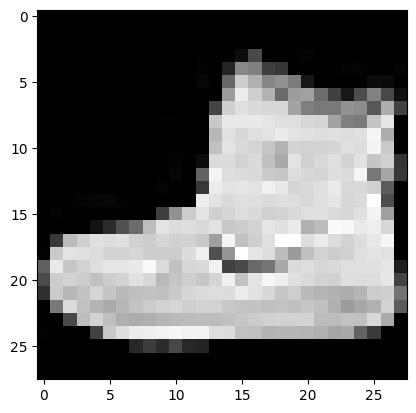

In [44]:
plt.imshow(image.squeeze(),cmap='gray')

## 7.1 Stepping through `nn.Conv2d()`

In [45]:
torch.manual_seed(42)
# Create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.797

In [46]:
torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3, #same number of colour channels as the test image
                       out_channels = 10,
                       kernel_size=3,
                       stride = 1,
                       padding = 0)

# Pass the data through a convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output,conv_output.shape

(tensor([[[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
           [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
           [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
           ...,
           [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
           [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
           [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
          [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
           [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
           [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
           ...,
           [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
           [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
           [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
          [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
           [ 

In [47]:
test_image.unsqueeze(0).shape # use unsqueeze to increase the dim

torch.Size([1, 3, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()`

In [48]:
#Print out orig shape and with unsqueezed dim
print(f"Test image orig shape: {test_image.shape}")
print(f"Test image with unsqueeze dim: {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass data through just the conv_layer
test_image_thru_conv = conv_layer(test_image.unsqueeze(0))
print(f"Shape after going thru conv_layer(): {test_image_thru_conv.shape}")

# Pass data thru max pool
test_image_thru_conv_and_maxPool = max_pool_layer(test_image_thru_conv)
print(f"Shape after going thru conv_layer and max pool: {test_image_thru_conv_and_maxPool.shape}")

Test image orig shape: torch.Size([3, 64, 64])
Test image with unsqueeze dim: torch.Size([1, 3, 64, 64])
Shape after going thru conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going thru conv_layer and max pool: torch.Size([1, 10, 31, 31])


In [49]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape:{random_tensor.shape}")
#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the random tensor thru the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape:torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


### 7.3 Set up a loss function and optimizer


In [50]:
# Setup loss function/eval/metrics/optimizer

from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)


### 7.4 Training and testing `model_2` using training and testing functions

In [51]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set up timer
from timeit import default_timer as Timer
from tqdm.auto import tqdm

train_time_start_model_2 = timer()

# Setup epochs
epochs = 3

#Training loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end= train_time_end_model_2,
                                            device = device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.595 | train acc: 78.38%
Test loss: 0.3950 | Test_acc: 85.99%
Epoch: 1
---------
Train loss: 0.365 | train acc: 86.90%
Test loss: 0.3524 | Test_acc: 86.91%
Epoch: 2
---------
Train loss: 0.326 | train acc: 88.13%
Test loss: 0.3272 | Test_acc: 88.07%
Train time cpu: 159.228 seconds


In [52]:
# Get model_2 results
model_2_results = eval_model(model = model_2.to('cpu'),
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             )
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [53]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.463976,83.716054
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.327190,88.069089


In [54]:
# Add training time to results comparison
compare_results["Training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,Training_time
0,FashionMNISTModelV0,0.463976,83.716054,55.389914
1,FashionMNISTModelV1,0.685001,75.019968,44.985479
2,FashionMNISTModelV2,0.327190,88.069089,159.228029


Text(0, 0.5, 'model')

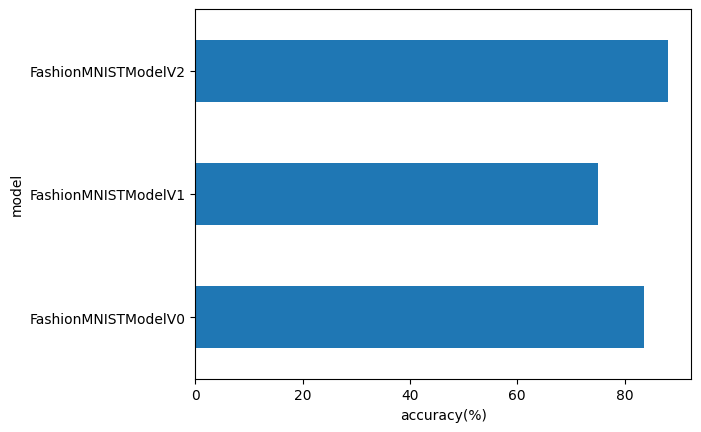

In [55]:
# Visulaize our model results

compare_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel("accuracy(%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model

In [56]:
def make_predictions(model:torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare a sample
      sample = torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass
      pred_logits = model(sample)

      # Get pred_prob
      pred_prob = torch.softmax(pred_logits.squeeze(),dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  #Stack the pred_probs to turn the list into a tensor
  return torch.stack(pred_probs)


Text(0.5, 1.0, 'Sandal')

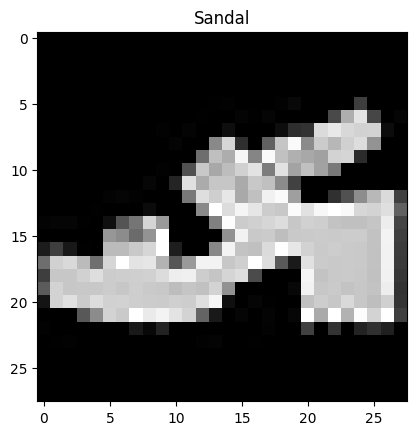

In [57]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)


#View the first sample shape
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]])

In [58]:
# Make predictions
pred_probs = make_predictions(model = model_2,
                              data = test_samples)

#View first 2 prediction probabilities
pred_probs[:2]
pred_classes = pred_probs.argmax(dim=1)
pred_classes,test_labels

(tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]), [5, 1, 7, 4, 3, 0, 4, 7, 1])

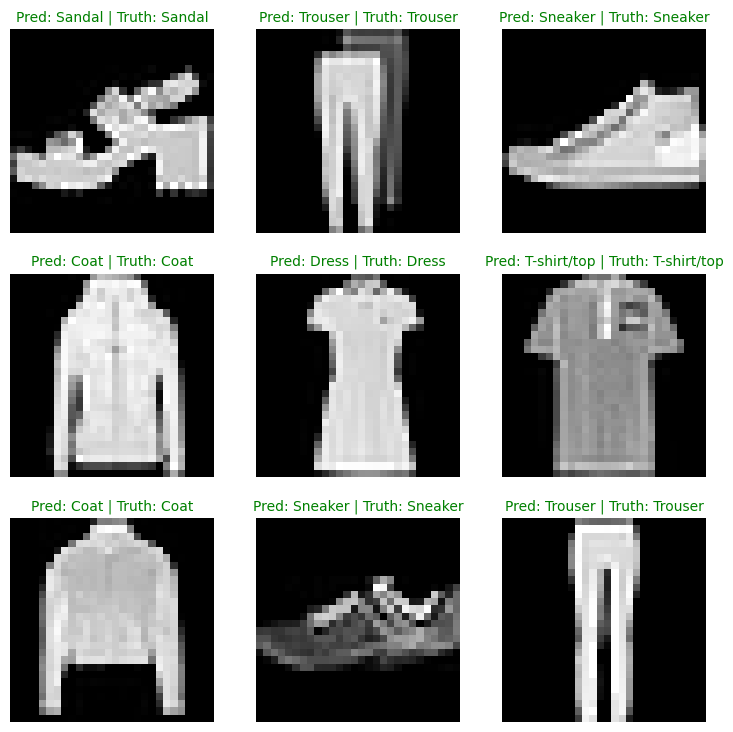

In [59]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #Create a sub plot for each sample
  plt.subplot(nrows,ncols,i+1)

  #Plot the image
  plt.imshow(sample.squeeze(),cmap='gray')

  #Find the prediction in text format
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check the equality between pred and truth
  if pred_label == truth_label:
    plt.title(title_text,fontsize=10, c='g') # green text if prediction is same as truth
  else:
    plt.title(title_text, fontsize=10,c = 'r')

  plt.axis(False)

## 10. Plot a confusion matrix for further prediction evaluation
Reference - https://www.learnpytorch.io/02_pytorch_classification/#9-more-classification-evaluation-metrics

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix` -https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html
3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`


In [60]:
import mlxtend

In [61]:
mlxtend.__version__

'0.23.4'

In [71]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader,desc = "Making predictions"):
    #Send the data to device
    X,y = X.to(device),y.to(device)

    #Do the forward pass
    y_logits = model_2(X)

    #Loss and acc
    y_pred = torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)

    #Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor, len(y_pred_tensor)



Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1,  ..., 8, 1, 8]), 10000)

In [74]:
# See if required packages are installed and if not, install them
try:
  import torchmetrics,mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >=19, "mlxtend version should 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4
mlxtend version: 0.23.4


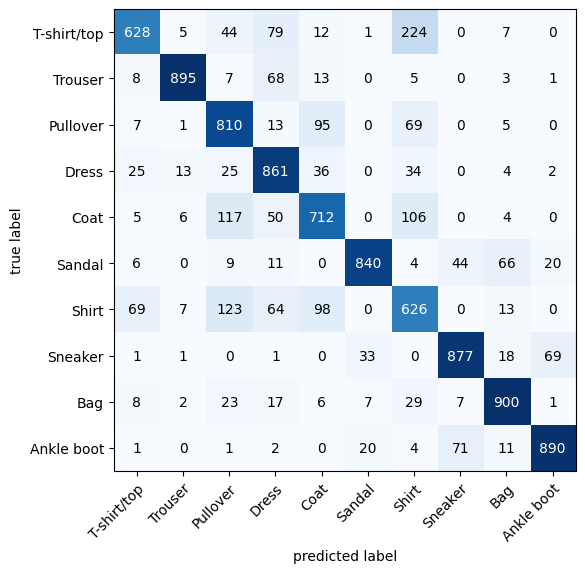

In [79]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(task = 'multiclass',num_classes = len(class_names))
confmat_tensor = confmat(preds= y_pred_tensor,
                         target=test_data.targets)
# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), #matplotlib allows numpy only
    class_names = class_names,
    figsize=(10,6))

## 11. Save and load our best model

In [81]:
from pathlib import Path

#Create a model directory path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,
                 exist_ok=True)

#Create Save model
MODEL_NAME="03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# SAve the model sate dict
torch.save(obj = model_2.state_dict(), f = MODEL_SAVE_PATH)


In [82]:
from IPython.terminal.embed import load_default_config
torch.manual_seed(42)
#Create a new instance of the model
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units = 10,
                                     output_shape = len(class_names))

# Load the saved model
loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

loaded_model_2.to(device)


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [83]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [85]:
#Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(model = loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn = accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}